In [288]:
import numpy as np
import matplotlib.pyplot as plt

cov = np.array([[0.8, 0.6, 0.3],
 [0.6, 0.7,  0.1],
 [0.1, 0.4, 0.2]])
mean = np.array([5, 5, 5])
data = np.random.multivariate_normal(mean, cov = cov, size = 3000)

def split_2_labels(data,cov,mean, d = 1, eps = 0.1):
    class1 = []
    class2 = []
    for point in data:
        mean_reduce = np.expand_dims(point-mean,axis = 1)
        temp = (mean_reduce.T @ cov @ mean_reduce).squeeze()
        if temp<= d**2 - eps**2:
            class1.append(point)
        else:
            class2.append(point)
    
    return np.array(class1)[:1000],np.array(class2)[:1000]


/tmp/ipykernel_26619/438929231.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal(mean, cov = cov, size = 3000)


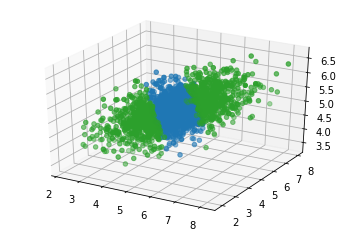

1000
1000


In [289]:
def plot_data(data,cov,mean):

    data1,data2 = split_2_labels(data,cov,mean)

    fig = plt.figure()

    ax = fig.add_subplot(111, projection='3d')
    try:
        ax.scatter(data1[:,0], data1[:,1], data1[:,2],c = '#1f77b4')
    except:
        ...
    try:
        ax.scatter(data2[:,0], data2[:,1], data2[:,2],c = '#2ca02c')
    except:
        ...
    plt.show()

    return data1[:1000],data2[:1000]

data1,data2 = plot_data(data,cov,mean)
print(data1.shape[0])
print(data2.shape[0])

x_train = np.concatenate([data1,-data2])
x_test = np.concatenate([data1,data2])



In [290]:
def ksi(x):
    out = []
    for i in range(3):
        for j in range(3):
            out.append(x[i]*x[j])

    for i in range(3):
        out.append(x[i])
    out.append(1)
    return np.array(out)

def get_ksi_x(x):
    out = []
    for i in range(len(x)):
        out.append(ksi(x[i]))
    return np.array(out)

ksi_x = get_ksi_x(x_train)
print(ksi_x.shape)

(2000, 13)


In [293]:
def get_params(lambd):
    cov = np.cov(lambd[:9].reshape(3,3),rowvar=False)
    mean = lambd[9:12]
    return cov,mean


def perceptron(ksi_x,x_test):
    lambd = np.zeros(ksi_x.shape[1])
    for i in range(len(ksi_x)):
        if np.dot(lambd,ksi_x[i])<=0:
            print('add')
            lambd+=ksi_x[i]
        cov,mean = get_params(lambd)
        if i%100==0:
            print(f'mean = {mean} \n cov = {cov}')
            _,_ = plot_data(x_test,cov,mean)

    return cov,mean
    
        
        

add
mean = [5.50178943 5.16637857 4.9596784 ] 
 cov = [[2.26573536 2.12760717 2.04248434]
 [2.12760717 1.99789981 1.91796641]
 [2.04248434 1.91796641 1.84123104]]


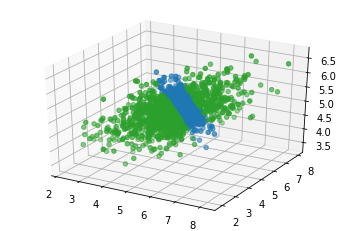

mean = [5.50178943 5.16637857 4.9596784 ] 
 cov = [[2.26573536 2.12760717 2.04248434]
 [2.12760717 1.99789981 1.91796641]
 [2.04248434 1.91796641 1.84123104]]


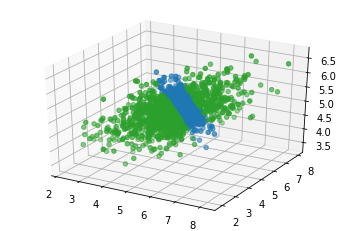

mean = [5.50178943 5.16637857 4.9596784 ] 
 cov = [[2.26573536 2.12760717 2.04248434]
 [2.12760717 1.99789981 1.91796641]
 [2.04248434 1.91796641 1.84123104]]


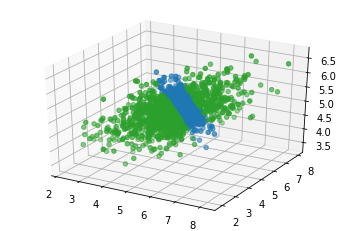

mean = [5.50178943 5.16637857 4.9596784 ] 
 cov = [[2.26573536 2.12760717 2.04248434]
 [2.12760717 1.99789981 1.91796641]
 [2.04248434 1.91796641 1.84123104]]


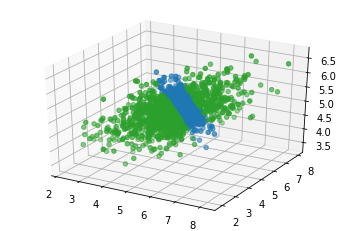

mean = [5.50178943 5.16637857 4.9596784 ] 
 cov = [[2.26573536 2.12760717 2.04248434]
 [2.12760717 1.99789981 1.91796641]
 [2.04248434 1.91796641 1.84123104]]


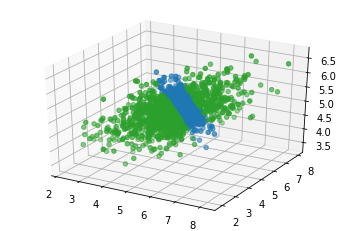

mean = [5.50178943 5.16637857 4.9596784 ] 
 cov = [[2.26573536 2.12760717 2.04248434]
 [2.12760717 1.99789981 1.91796641]
 [2.04248434 1.91796641 1.84123104]]


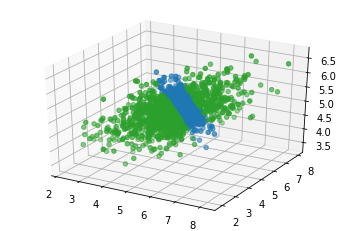

mean = [5.50178943 5.16637857 4.9596784 ] 
 cov = [[2.26573536 2.12760717 2.04248434]
 [2.12760717 1.99789981 1.91796641]
 [2.04248434 1.91796641 1.84123104]]


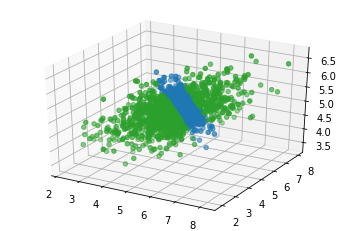

mean = [5.50178943 5.16637857 4.9596784 ] 
 cov = [[2.26573536 2.12760717 2.04248434]
 [2.12760717 1.99789981 1.91796641]
 [2.04248434 1.91796641 1.84123104]]


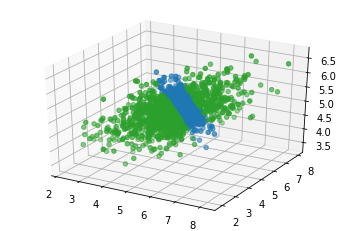

mean = [5.50178943 5.16637857 4.9596784 ] 
 cov = [[2.26573536 2.12760717 2.04248434]
 [2.12760717 1.99789981 1.91796641]
 [2.04248434 1.91796641 1.84123104]]


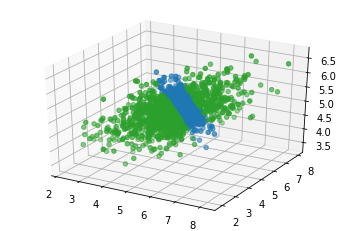

mean = [5.50178943 5.16637857 4.9596784 ] 
 cov = [[2.26573536 2.12760717 2.04248434]
 [2.12760717 1.99789981 1.91796641]
 [2.04248434 1.91796641 1.84123104]]


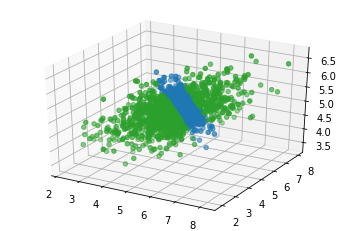

mean = [5.50178943 5.16637857 4.9596784 ] 
 cov = [[2.26573536 2.12760717 2.04248434]
 [2.12760717 1.99789981 1.91796641]
 [2.04248434 1.91796641 1.84123104]]


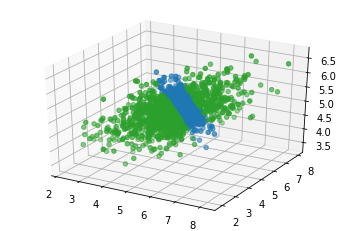

mean = [5.50178943 5.16637857 4.9596784 ] 
 cov = [[2.26573536 2.12760717 2.04248434]
 [2.12760717 1.99789981 1.91796641]
 [2.04248434 1.91796641 1.84123104]]


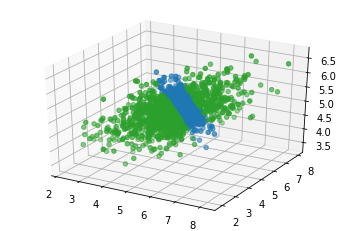

mean = [5.50178943 5.16637857 4.9596784 ] 
 cov = [[2.26573536 2.12760717 2.04248434]
 [2.12760717 1.99789981 1.91796641]
 [2.04248434 1.91796641 1.84123104]]


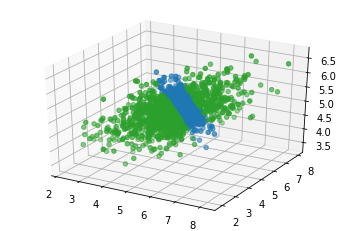

mean = [5.50178943 5.16637857 4.9596784 ] 
 cov = [[2.26573536 2.12760717 2.04248434]
 [2.12760717 1.99789981 1.91796641]
 [2.04248434 1.91796641 1.84123104]]


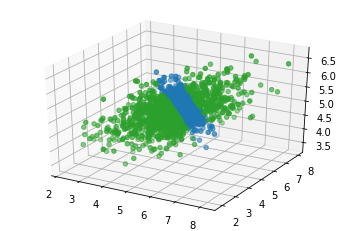

mean = [5.50178943 5.16637857 4.9596784 ] 
 cov = [[2.26573536 2.12760717 2.04248434]
 [2.12760717 1.99789981 1.91796641]
 [2.04248434 1.91796641 1.84123104]]


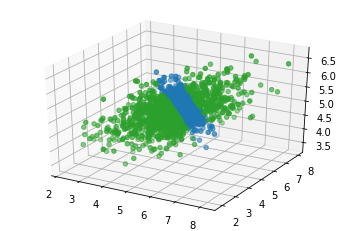

mean = [5.50178943 5.16637857 4.9596784 ] 
 cov = [[2.26573536 2.12760717 2.04248434]
 [2.12760717 1.99789981 1.91796641]
 [2.04248434 1.91796641 1.84123104]]


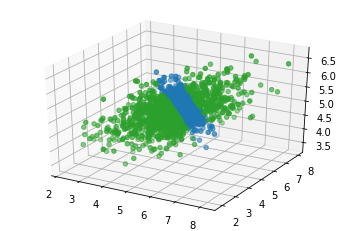

mean = [5.50178943 5.16637857 4.9596784 ] 
 cov = [[2.26573536 2.12760717 2.04248434]
 [2.12760717 1.99789981 1.91796641]
 [2.04248434 1.91796641 1.84123104]]


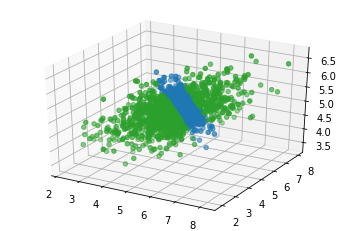

mean = [5.50178943 5.16637857 4.9596784 ] 
 cov = [[2.26573536 2.12760717 2.04248434]
 [2.12760717 1.99789981 1.91796641]
 [2.04248434 1.91796641 1.84123104]]


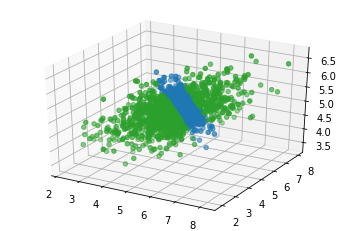

mean = [5.50178943 5.16637857 4.9596784 ] 
 cov = [[2.26573536 2.12760717 2.04248434]
 [2.12760717 1.99789981 1.91796641]
 [2.04248434 1.91796641 1.84123104]]


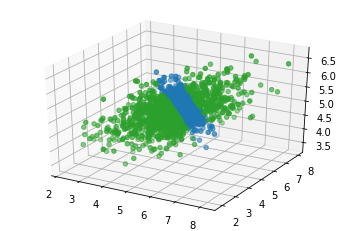

mean = [5.50178943 5.16637857 4.9596784 ] 
 cov = [[2.26573536 2.12760717 2.04248434]
 [2.12760717 1.99789981 1.91796641]
 [2.04248434 1.91796641 1.84123104]]


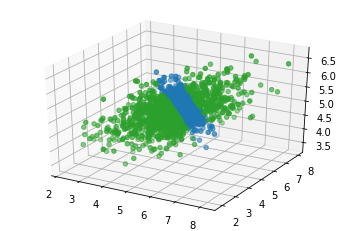

In [294]:
final_cov,final_mean = perceptron(ksi_x,x_test)